In [90]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
from bayes_opt import BayesianOptimization
from scipy.interpolate import interp1d

In [91]:
def interp_func(x1,y1,x2,y2,x):
    interp1 = interp1d(x1,y1, fill_value='extrapolate', kind='nearest')
    interp2 = interp1d(x2,y2, fill_value='extrapolate', kind='nearest')
    return x, interp1(x) + interp2(x)

In [92]:
bayesian_optimizer = BayesianOptimization(
    f=None,
    pbounds={-2:(-10,10),-1:(-10,10),0:(0,0),1:(-10,10),2:(-10,10)},
    verbose=2,
    random_state=893
)

In [93]:
from bayes_opt import UtilityFunction
utility = UtilityFunction(kind="ucb", kappa=5, xi=0.0)
next_probe_point = bayesian_optimizer.suggest(utility)

In [94]:
x = list(next_probe_point.keys())
y = [next_probe_point[i] for i in x]

In [95]:
akima = interpolate.Akima1DInterpolator(x,y)

In [98]:
s1, s2 = interp_func(np.linspace(-2,2,200),akima(np.linspace(-2,2,200)),np.linspace(-100,100,200),np.linspace(-100,100,200)*0,np.linspace(-5,5,200))

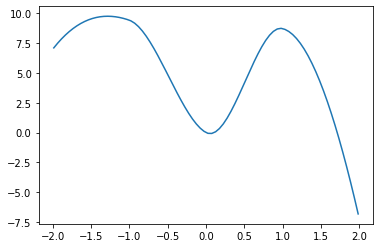

In [88]:
plt.plot(np.linspace(-5,5,200), akima(np.linspace(-5,5,200)))

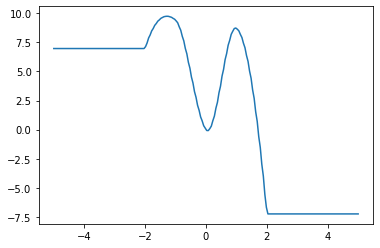

In [99]:
plt.plot(s1,s2)